# Step-by-step tutorial to implement CNN on MNIST data using PyTorch




## First, import required packages









In [0]:
import torch
import torchvision #popular datasets, model architectures, and common image transformations
from torchvision import transforms # needed for converting images to tensor and data pre-processing
import torch.nn as nn #Required for model - layers with parameters and without input
import torch.nn.functional as fun #required for layers with input and without parameters
import numpy as np
import torch.optim as optim #Required for optimizers like SGD, Adam
import matplotlib.pyplot as plt #Plotting library
import time #Measure model performance



## Import MNIST dataset from torchvision and normalize it with transforms



In [4]:
#Converting images to tensor and normalizing them
generic_transform = transforms.Compose([
    transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))
])
#importing mnist data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True,transform=generic_transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True,transform=generic_transform)

0it [00:00, ?it/s]

9920512it [00:01, 9538578.08it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 137744.47it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2250568.31it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 52690.18it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!




### Create model and add layers to the class. 
*   You can obtain no. of parameters in the model when you add layers to the class variables



In [0]:
class Net(nn.Module):
  def __init__(self):   
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1,20,3)
    self.fc1=nn.Linear(13*13*20,128)
    self.fc2=nn.Linear(128,10)
  
  def forward(self,x):
    x=fun.relu(fun.max_pool2d(self.conv1(x),(2,2)))
    x = x.view(-1, self.num_flat_features(x))
    x=fun.relu(self.fc1(x))
    x=fun.softmax(self.fc2(x))
    return x
  
  def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


### **Model Architecture**
*   Input:  1-channel input, size 28x28
*   Convolution layer:  Convolution kernel size is (3, 3) with stride as 1.  Input channels - 1; Output channels - 20

*   Max-pool:  2x2 max pool
*   ReLu Layer
*   Flatten input for feed to fully connected layers
*   Fully connected layer 1:  flattened input with bias; output - 128
*   ReLu Layer
*   Fully connected layer 2:  input - 128; output - 10
*   Softmax layer


### Do training in batches till the model converges. We used cross entropy as loss function and SGD as optimizer here 


In [6]:
net = Net()
print(net)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.09)
n_epochs = 50
learning_rate=0.01
accuracy=[]
losses =[]
delta = 0.0005
grad = 0
pre_grad = -1
pre_loss = -10
for epoch in range(n_epochs):
  if( abs(grad-pre_grad) < delta ):
      print(f'Model converged at epoch={epoch}')
      break
  cost=0
  total=0
  correct=0
  trainloader=torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss=criterion(outputs, labels)
    pre_grad = grad
    grad = loss-pre_loss
    pre_loss = loss
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    cost+=loss.item()
    if(i%1000 == 0):
      print(f'epoch: {epoch+1}, batch: {i}, loss: {cost/(i+1)}')
  losses.append(cost/i)
  print(f'epoch: {epoch+1}, batch: {i}, loss: {cost/(i+1)}, Accuracy:  {100 * correct / total}')
  accuracy.append(100 * correct / total)
print(f'Finished Training at epoch {epoch}')
#saving model
PATH = './mnist-cnn.pth'
torch.save(net.state_dict(), PATH)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=3380, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
epoch: 1, batch: 0, loss: 2.306314706802368


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


epoch: 1, batch: 1000, loss: 1.7785596284237537
epoch: 1, batch: 1874, loss: 1.7014689316431681, Accuracy:  76.99
epoch: 2, batch: 0, loss: 1.6252609491348267
epoch: 2, batch: 1000, loss: 1.5939825535058738
epoch: 2, batch: 1874, loss: 1.5724908984502157, Accuracy:  89.25166666666667
epoch: 3, batch: 0, loss: 1.6541833877563477
epoch: 3, batch: 1000, loss: 1.4982406316579997
epoch: 3, batch: 1874, loss: 1.496001358985901, Accuracy:  96.93
epoch: 4, batch: 0, loss: 1.4936269521713257
epoch: 4, batch: 1000, loss: 1.4871749538522618
epoch: 4, batch: 1874, loss: 1.486876365661621, Accuracy:  97.67666666666666
epoch: 5, batch: 0, loss: 1.4915798902511597
epoch: 5, batch: 1000, loss: 1.4829493139411782
epoch: 5, batch: 1874, loss: 1.4822411312103272, Accuracy:  98.10166666666667
epoch: 6, batch: 0, loss: 1.4705747365951538
epoch: 6, batch: 1000, loss: 1.4791709106047075
epoch: 6, batch: 1874, loss: 1.479134307161967, Accuracy:  98.38166666666666
epoch: 7, batch: 0, loss: 1.542235255241394
ep

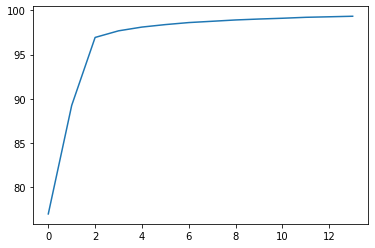

In [7]:
plt.plot(range(epoch),accuracy,label='Accuracy vs Epoch')

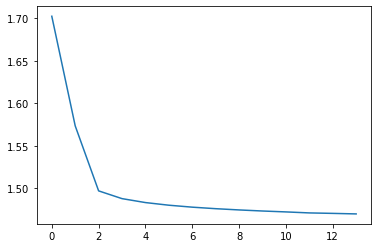

In [8]:
plt.plot(range(epoch),losses, label='Loss vs Epoch')



*   ## Print number of parameters


In [15]:
params = list(net.parameters())
for p in params:
  print(p.shape)


torch.Size([20, 1, 3, 3])
torch.Size([20])
torch.Size([128, 3380])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])


In [10]:
print(loss.grad_fn)  # Crossentropy
print(loss.grad_fn.next_functions[0][0])  # Softmax
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # FC2
print(loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])  # ReLU

### Test the model

In [11]:
testloader=torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)
testnet = Net()
testnet.load_state_dict(torch.load(PATH))
total=0
correct=0
for i,data in enumerate(testloader,0):
  inputs,labels = data
  outputs = testnet(inputs)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {testset.data.size()[0]} test images: {100 * correct / total}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


Accuracy of the network on the 10000 test images: 98.58


#Extras:

### Try different batch sizes and observe the model performance

In [16]:
batch_sizes=[32,64,96,128]
criterion = nn.CrossEntropyLoss()
n_epochs = 20
accuracy=[]
losses =[]
batch_time = []
for b in batch_sizes:
  net = Net()
  optimizer = optim.SGD(net.parameters(), lr=0.01)
  delta = 0.0005
  grad = 0
  pre_grad = -1
  pre_loss = -10
  start_time = time.time()
  for epoch in range(n_epochs):
    if( abs(grad-pre_grad) < delta ):
      print(f'Model converged at epoch={epoch}')
      break
    cost=0
    total=0
    correct=0
    trainloader=torch.utils.data.DataLoader(trainset, batch_size=b, shuffle=True)
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data
      optimizer.zero_grad()
      outputs = net(inputs)
      loss=criterion(outputs, labels)
      pre_grad = grad
      grad = loss-pre_loss
      pre_loss = loss
      loss.backward()
      optimizer.step()
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      cost += loss.item()
    losses.append(cost/i)
  end_time = time.time()  #Model converged
  elapsed_time = end_time - start_time  # Total time elapsed while converging
  batch_time.append(elapsed_time)
  print(f'batch: {b}, loss: {cost/(i+1)}, Accuracy:  {100 * correct / total}')
  accuracy.append(100 * correct / total)
print(f'Finished Training at epoch {epoch}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


Model converged at epoch=6
batch: 32, loss: 1.5390656495412192, Accuracy:  93.14
batch: 64, loss: 1.5064784100314956, Accuracy:  96.06666666666666
batch: 96, loss: 1.597285542488098, Accuracy:  86.855
batch: 128, loss: 1.6895304903038528, Accuracy:  77.41166666666666
Finished Training at epoch 19


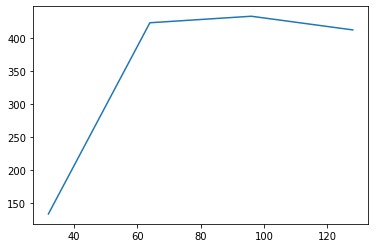

In [17]:
plt.plot(batch_sizes,batch_time)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


epoch: 1, batch: 0, loss: 2.2997989654541016
epoch: 1, batch: 1000, loss: 1.6911649018019943
epoch: 1, batch: 1874, loss: 1.6136433687845866, Accuracy:  86.465
epoch: 2, batch: 0, loss: 1.4729719161987305
epoch: 2, batch: 1000, loss: 1.506114696884727
epoch: 2, batch: 1874, loss: 1.5023017833709718, Accuracy:  96.325
epoch: 3, batch: 0, loss: 1.4676884412765503
epoch: 3, batch: 1000, loss: 1.4913146551791485
epoch: 3, batch: 1874, loss: 1.489871529006958, Accuracy:  97.44166666666666
epoch: 4, batch: 0, loss: 1.5072842836380005
epoch: 4, batch: 1000, loss: 1.4844996022892285
epoch: 4, batch: 1874, loss: 1.4840012715657551, Accuracy:  97.93166666666667
epoch: 5, batch: 0, loss: 1.4661283493041992
epoch: 5, batch: 1000, loss: 1.4800268855842795
epoch: 5, batch: 1874, loss: 1.4799933495203654, Accuracy:  98.32166666666667
epoch: 6, batch: 0, loss: 1.4621502161026
epoch: 6, batch: 1000, loss: 1.477778140957896
epoch: 6, batch: 1874, loss: 1.4770448499043782, Accuracy:  98.62166666666667
ep

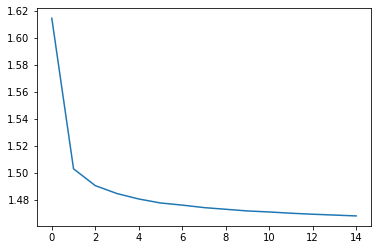

In [18]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.09)
n_epochs = 20
accuracy=[]
losses =[]
delta = 0.0005
grad = 0
pre_grad = -1
pre_loss = -10
for epoch in range(n_epochs):
  if( abs(grad-pre_grad) < delta ):
      print(f'Model converged at epoch={epoch}')
      break
  cost=0
  total=0
  correct=0
  trainloader=torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss=criterion(outputs, labels)
    pre_grad = grad
    grad = loss-pre_loss
    pre_loss = loss
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    cost+=loss.item()
    if(i%1000 == 0):
      print(f'epoch: {epoch+1}, batch: {i}, loss: {cost/(i+1)}')
  losses.append(cost/i)
  print(f'epoch: {epoch+1}, batch: {i}, loss: {cost/(i+1)}, Accuracy:  {100 * correct / total}')
  accuracy.append(100 * correct / total)
print(f'Finished Training SGD at epoch {epoch}')
plt.plot(range(epoch),losses)

### Let's try Adam Optimizer

Net(
  (conv1): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=3380, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Adam
epoch: 1, batch: 0, loss: 2.3053195476531982


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


epoch: 1, batch: 1000, loss: 2.347670393152075
epoch: 1, batch: 1874, loss: 2.348834041849772, Accuracy:  11.221666666666666
epoch: 2, batch: 0, loss: 2.398650884628296
epoch: 2, batch: 1000, loss: 2.346858801779809
epoch: 2, batch: 1874, loss: 2.348784093093872, Accuracy:  11.236666666666666
epoch: 3, batch: 0, loss: 2.336150884628296
epoch: 3, batch: 1000, loss: 2.3482012053231496
epoch: 3, batch: 1874, loss: 2.3487840881347655, Accuracy:  11.236666666666666
epoch: 4, batch: 0, loss: 2.398650884628296
epoch: 4, batch: 1000, loss: 2.3480138940649193
epoch: 4, batch: 1874, loss: 2.348784091059367, Accuracy:  11.236666666666666
epoch: 5, batch: 0, loss: 2.211150646209717
epoch: 5, batch: 1000, loss: 2.349044115512402
epoch: 5, batch: 1874, loss: 2.348784093093872, Accuracy:  11.236666666666666
epoch: 6, batch: 0, loss: 2.336150646209717
epoch: 6, batch: 1000, loss: 2.34879436430993
epoch: 6, batch: 1874, loss: 2.3487840914408364, Accuracy:  11.236666666666666
epoch: 7, batch: 0, loss: 2

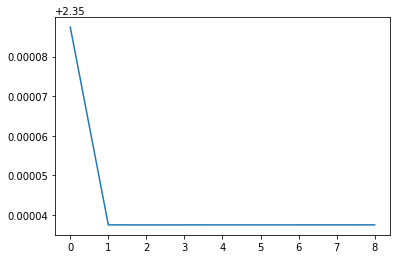

In [19]:
net = Net()
print(net)
criterion = nn.CrossEntropyLoss()
print('Adam')
optimizer = optim.Adam(net.parameters(), lr=0.01)
n_epochs = 30
accuracy=[]
losses =[]
delta = 0.0005
grad = 0
pre_grad = -1
pre_loss = -10
for epoch in range(n_epochs):
  if( abs(grad-pre_grad) < delta ):
      print(f'Model converged at epoch={epoch}')
      break
  cost=0
  total=0
  correct=0
  trainloader=torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss=criterion(outputs, labels)
    pre_grad = grad
    grad = loss-pre_loss
    pre_loss = loss
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    cost+=loss.item()
    if(i%1000 == 0):
      print(f'epoch: {epoch+1}, batch: {i}, loss: {cost/(i+1)}')
  losses.append(cost/i)
  print(f'epoch: {epoch+1}, batch: {i}, loss: {cost/(i+1)}, Accuracy:  {100 * correct / total}')
  accuracy.append(100 * correct / total)
print(f'Finished Training Adam at epoch {epoch}')
plt.plot(range(epoch),losses)

### Try Adagrad and observe the model performance on training

Adagrad
epoch: 1, batch: 0, loss: 2.304615020751953


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


epoch: 1, batch: 1000, loss: 1.760649944161559
epoch: 1, batch: 1874, loss: 1.7248217513402304, Accuracy:  73.83166666666666
epoch: 2, batch: 0, loss: 1.5236437320709229
epoch: 2, batch: 1000, loss: 1.6789054655052207
epoch: 2, batch: 1874, loss: 1.6751836675008138, Accuracy:  78.46666666666667
epoch: 3, batch: 0, loss: 1.5334187746047974
epoch: 3, batch: 1000, loss: 1.670747901057149
epoch: 3, batch: 1874, loss: 1.6695941993077597, Accuracy:  78.90166666666667
epoch: 4, batch: 0, loss: 1.8022840023040771
epoch: 4, batch: 1000, loss: 1.663798438323723
epoch: 4, batch: 1874, loss: 1.6664746950149536, Accuracy:  79.12166666666667
epoch: 5, batch: 0, loss: 1.5991986989974976
epoch: 5, batch: 1000, loss: 1.641064048647047
epoch: 5, batch: 1874, loss: 1.6049674858093261, Accuracy:  85.59166666666667
epoch: 6, batch: 0, loss: 1.5211986303329468
epoch: 6, batch: 1000, loss: 1.4852913616896866
epoch: 6, batch: 1874, loss: 1.48330350189209, Accuracy:  98.225
epoch: 7, batch: 0, loss: 1.50075447

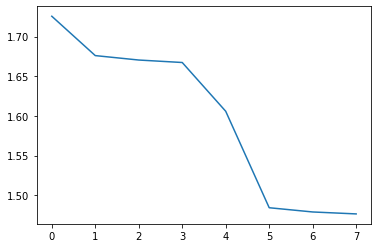

In [21]:
print('Adagrad')
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(), lr=0.01)
n_epochs = 30
accuracy=[]
losses =[]
delta = 0.0005
grad = 0
pre_grad = -1
pre_loss = -10
for epoch in range(n_epochs):
  if( abs(grad-pre_grad) < delta ):
      print(f'Model converged at epoch={epoch}')
      break
  cost=0
  total=0
  correct=0
  trainloader=torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss=criterion(outputs, labels)
    pre_grad = grad
    grad = loss-pre_loss
    pre_loss = loss
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    cost+=loss.item()
    if(i%1000 == 0):
      print(f'epoch: {epoch+1}, batch: {i}, loss: {cost/(i+1)}')
  losses.append(cost/i)
  print(f'epoch: {epoch+1}, batch: {i}, loss: {cost/(i+1)}, Accuracy:  {100 * correct / total}')
  accuracy.append(100 * correct / total)
print(f'Finished Training adagrad at epoch {epoch}')
plt.plot(range(epoch),losses)